<a href="https://colab.research.google.com/github/malikwaqas077/NCP_Data_Analysis/blob/main/NCP_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning and Preparation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('NPS_Dataset.xlsx')

In [ ]:
df.head()

,Regime,Application Type,OTL Code,Sector_ID,Facility/Activity Type,Preapp Type,additional info requested,Date Complete,first allocated date,Determined date,Categories,Decision,year,queue time,Det time,Total e2e
0,Water Quality,Variation,WQ_Variation,3,Residential,NaN,False,2022-11-21,2023-01-23,2023-02-15,Cat1,Issued,2023,63,NaN,NaN
1,Water Quality,Variation,WQ_Variation,11,Water Infrastructure,NaN,True,2021-08-09,2022-05-13,2022-05-19,Cat1,Issued,2022,277,NaN,NaN
2,Water Quality,Variation,WQ_Variation,14,Water Infrastructure,NaN,False,2021-08-09,2022-05-13,2022-05-19,Cat1,Issued,2022,277,NaN,NaN
3,Water Quality,Variation,WQ_Variation,17,Water Infrastructure,NaN,False,2021-12-17,2022-07-15,2023-01-03,Cat2,Issued,2023,210,NaN,NaN
4,Water Quality,Variation,WQ_Variation,17,Water Infrastructure,Basic,False,2021-06-01,2021-09-27,2022-03-22,Cat3,Issued,2022,118,NaN,NaN


**Check for Missing Value**

In [ ]:
# Check for missing data in the main dataset
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 Regime                          0
Application Type                0
OTL Code                        0
Sector_ID                       0
Facility/Activity Type          0
Preapp Type                  4761
additional info requested       0
Date Complete                   0
first allocated date            0
Determined date                 0
Categories                      0
Decision                        0
year                            0
queue time                      0
Det time                     5448
Total e2e                    5448
dtype: int64


In [ ]:
# Impute missing values in 'Preapp Type' with the mode
df['Preapp Type'].fillna(df['Preapp Type'].mode()[0], inplace=True)

These columns represent the number of days, and it's not suitable to impute them with the mode or mean.

In [ ]:
df.head()

,Regime,Application Type,OTL Code,Sector_ID,Facility/Activity Type,Preapp Type,additional info requested,Date Complete,first allocated date,Determined date,Categories,Decision,year,queue time,Det time,Total e2e
0,Water Quality,Variation,WQ_Variation,3,Residential,Basic,False,2022-11-21,2023-01-23,2023-02-15,Cat1,Issued,2023,63,NaN,NaN
1,Water Quality,Variation,WQ_Variation,11,Water Infrastructure,Basic,True,2021-08-09,2022-05-13,2022-05-19,Cat1,Issued,2022,277,NaN,NaN
2,Water Quality,Variation,WQ_Variation,14,Water Infrastructure,Basic,False,2021-08-09,2022-05-13,2022-05-19,Cat1,Issued,2022,277,NaN,NaN
3,Water Quality,Variation,WQ_Variation,17,Water Infrastructure,Basic,False,2021-12-17,2022-07-15,2023-01-03,Cat2,Issued,2023,210,NaN,NaN
4,Water Quality,Variation,WQ_Variation,17,Water Infrastructure,Basic,False,2021-06-01,2021-09-27,2022-03-22,Cat3,Issued,2022,118,NaN,NaN


In [ ]:
# Impute missing values in 'Det time' with the mean
df['Det time'].fillna(df['Det time'].mean(), inplace=True)

# Impute missing values in 'Total e2e' with the mean
df['Total e2e'].fillna(df['Total e2e'].mean(), inplace=True)


In [ ]:
df.head()

,Regime,Application Type,OTL Code,Sector_ID,Facility/Activity Type,Preapp Type,additional info requested,Date Complete,first allocated date,Determined date,Categories,Decision,year,queue time,Det time,Total e2e
0,Water Quality,Variation,WQ_Variation,3,Residential,Basic,False,2022-11-21,2023-01-23,2023-02-15,Cat1,Issued,2023,63,NaN,NaN
1,Water Quality,Variation,WQ_Variation,11,Water Infrastructure,Basic,True,2021-08-09,2022-05-13,2022-05-19,Cat1,Issued,2022,277,NaN,NaN
2,Water Quality,Variation,WQ_Variation,14,Water Infrastructure,Basic,False,2021-08-09,2022-05-13,2022-05-19,Cat1,Issued,2022,277,NaN,NaN
3,Water Quality,Variation,WQ_Variation,17,Water Infrastructure,Basic,False,2021-12-17,2022-07-15,2023-01-03,Cat2,Issued,2023,210,NaN,NaN
4,Water Quality,Variation,WQ_Variation,17,Water Infrastructure,Basic,False,2021-06-01,2021-09-27,2022-03-22,Cat3,Issued,2022,118,NaN,NaN


**Question 1: What are the different Application Types submitted, and which Application Type appears most frequently in the dataset?**



*   Calculate and present a summary of each unique application type
*   Highlight which application type appears most frequently.





**Extract unique application types**

In [ ]:
# Extract unique application types
unique_application_types = df['Application Type'].unique()

# Display the list of different Application Types
print("Different Application Types Submitted:")
for app_type in unique_application_types:
    print(app_type)

Different Application Types Submitted:
Variation
Surrender
Transfer
New Permit
Renewal


**Most Application Count**

In [ ]:
application_type_counts = df['Application Type'].value_counts()

# Check if there are any non-numeric values
if not application_type_counts.empty:
    # Identify the most frequent application type
    most_frequent_application_type = application_type_counts.idxmax()
    most_frequent_application_type_count = application_type_counts.max()

    # Print the most frequent application type
    print("The most frequent application type is:")
    print(f"Application Type: {most_frequent_application_type}")
    print(f"Frequency: {most_frequent_application_type_count} times")
else:
    print("No data to analyze.")

The most frequent application type is:
Application Type: New Permit
Frequency: 3114 times


**Visualize all the Application Types in a bar graph**

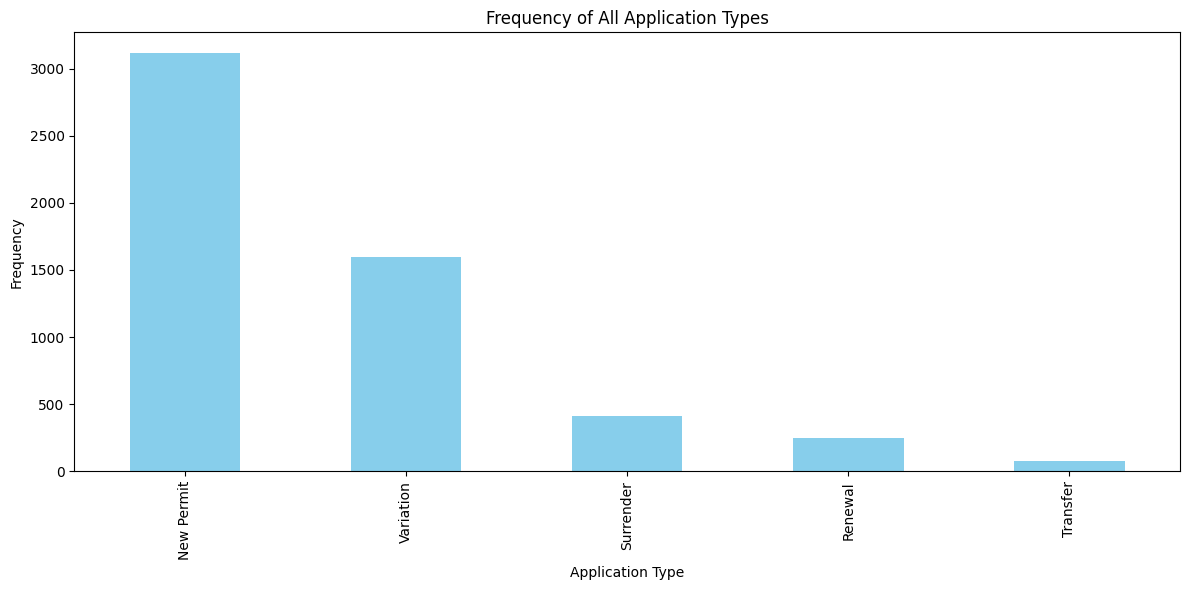

In [ ]:
application_type_counts = df['Application Type'].value_counts()

# Create a bar chart to visualize the frequencies of each Application Type
plt.figure(figsize=(12, 6))
application_type_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of All Application Types')
plt.xlabel('Application Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

**Question 2: Which Sector has the highest percentage of applications refused in the 2022/2023 financial year (1st April 2022 – 31st March 2023)?**

* Filter the dataset for the specified financial year.
* Calculate the percentage of applications refused for each sector in that year.
* Identify the sector with the highest refusal rate.

**Filter the dataset**

In [ ]:
df['Determined date'] = pd.to_datetime(df['Determined date'])

# Define the start and end dates of the 2022/2023 financial year
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2023-03-31')

# Filter the dataset for the specified financial year
financial_year_df = df[(df['Determined date'] >= start_date) & (df['Determined date'] <= end_date)]


**Narrow Down Filters to get Highest Refulsal Percentage**


In [ ]:
# Calculate the number of refused applications in the financial year by Sector

total_applications_by_sector = financial_year_df['Sector_ID'].value_counts()

# Calculate the number of refused applications in the financial year by Sector
refused_applications_by_sector = financial_year_df[financial_year_df['Decision'] == 'Refused']['Sector_ID'].value_counts()

# Calculate the percentage of refused applications for each Sector
percentage_refused_by_sector = (refused_applications_by_sector / total_applications_by_sector) * 100

# Identify the Sector with the highest percentage of refusals
sector_highest_refusal_percentage = percentage_refused_by_sector.idxmax()
highest_refusal_percentage = percentage_refused_by_sector.max()
print(highest_refusal_percentage)


81.48148148148148


**visualize the percentages of refusals by Sector**


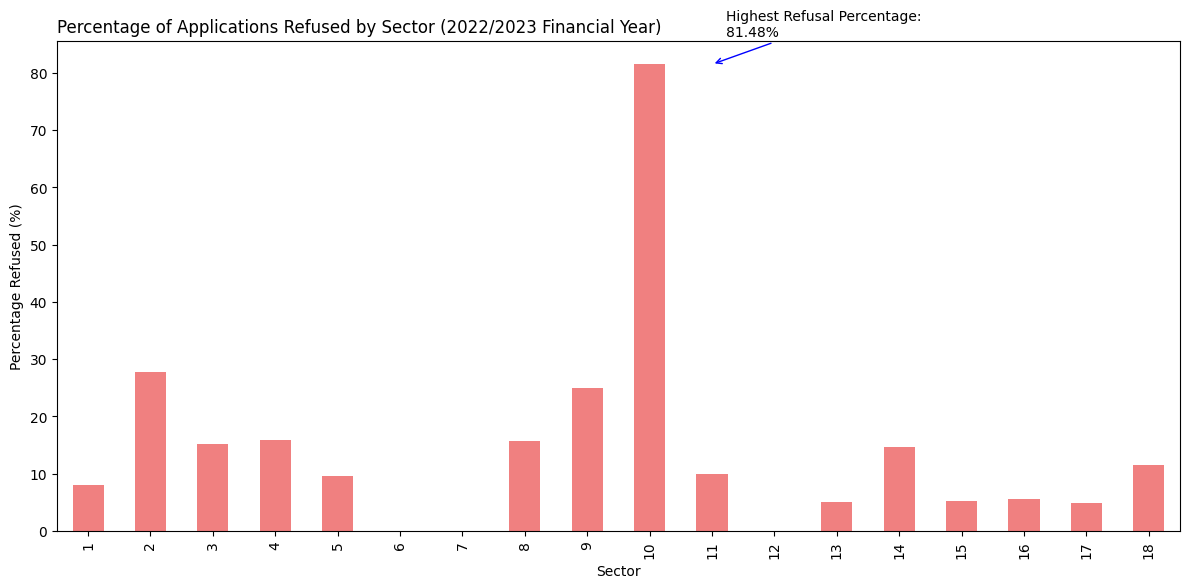

Sector with the Highest Refusal Percentage:
Sector ID: 10
Refusal Percentage: 81.48%


In [ ]:
# Create a bar chart to visualize the percentages of refusals by Sector
plt.figure(figsize=(12, 6))
percentage_refused_by_sector.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Applications Refused by Sector (2022/2023 Financial Year)',  loc='left')
plt.xlabel('Sector')
plt.ylabel('Percentage Refused (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Highlight the Sector with the highest refusal percentage with better spacing
plt.annotate(f'Highest Refusal Percentage:\n{highest_refusal_percentage:.2f}%',
             xy=(sector_highest_refusal_percentage, highest_refusal_percentage),
             xytext=(10, 20),  # Adjust the spacing
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='blue'))

plt.tight_layout()
plt.show()

# Print the Sector with the highest refusal percentage
print("Sector with the Highest Refusal Percentage:")
print(f"Sector ID: {sector_highest_refusal_percentage}")
print(f"Refusal Percentage: {highest_refusal_percentage:.2f}%")

**Question 3: What is the average time taken to determine applications for each category?**

* Calculate the average Det Time for each Category.
* Present the results in a table or chart, showing the average time for each category.

Average Det Time by Category and Application Type:
   Categories Application Type    Det time
0        Cat1       New Permit   14.600000
1        Cat1        Surrender   19.041916
2        Cat1        Variation   40.194444
3        Cat2       New Permit   55.483089
4        Cat2          Renewal  177.048458
5        Cat2        Surrender   46.492754
6        Cat2         Transfer   50.014925
7        Cat2        Variation   45.921466
8        Cat3       New Permit  149.342246
9        Cat3          Renewal  166.166667
10       Cat3         Transfer   20.000000
11       Cat3        Variation  132.442857
12       Cat4        Surrender  148.100000
13       Cat4        Variation  204.250000
14       Cat5       New Permit  335.000000
15       Cat5        Variation  237.941176


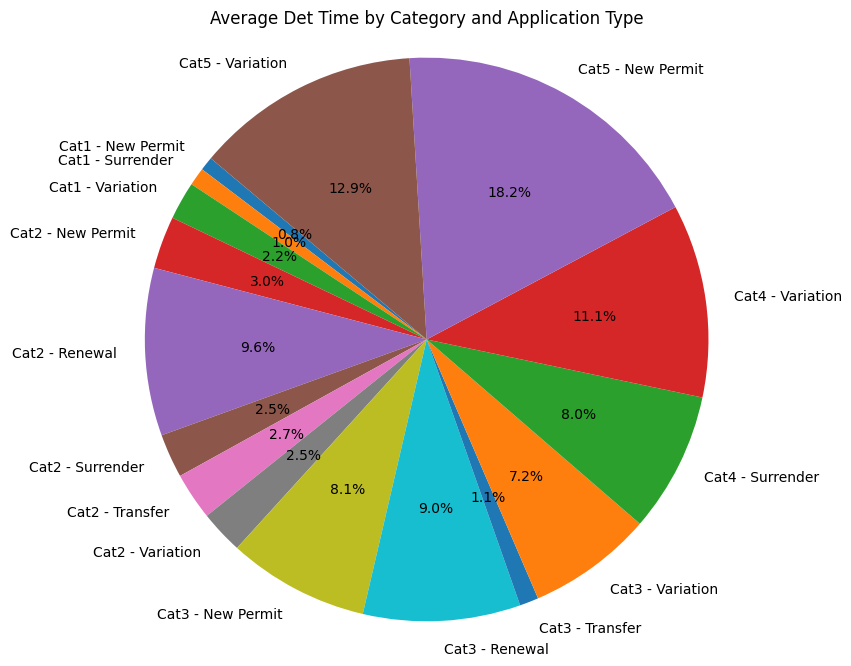

In [ ]:

# Convert date columns to datetime objects
date_columns = ['Date Complete', 'first allocated date', 'Determined date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate the Det Time (days to determine an application)
df['Det time'] = (df['Determined date'] - df['first allocated date']).dt.days

# Group the data by 'Categories' and 'Application Type' columns
# Calculate the average Det Time for each category and application type combination
average_det_time_by_category_type = df.groupby(['Categories', 'Application Type'])['Det time'].mean().reset_index()

# Print the resulting table with average Det Time for each category and application type
print("Average Det Time by Category and Application Type:")
print(average_det_time_by_category_type)

# Create a pie chart to visualize the average Det Time for each category and application type
plt.figure(figsize=(8, 8))
plt.pie(average_det_time_by_category_type['Det time'], labels=average_det_time_by_category_type.apply(lambda x: f"{x['Categories']} - {x['Application Type']}", axis=1), autopct='%1.1f%%', startangle=140)
plt.title('Average Det Time by Category and Application Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
df.head()

,Regime,Application Type,OTL Code,Sector_ID,Facility/Activity Type,Preapp Type,additional info requested,Date Complete,first allocated date,Determined date,Categories,Decision,year,queue time,Det time,Total e2e
0,Water Quality,Variation,WQ_Variation,3,Residential,Basic,False,2022-11-21,2023-01-23,2023-02-15,Cat1,Issued,2023,63,23,NaN
1,Water Quality,Variation,WQ_Variation,11,Water Infrastructure,Basic,True,2021-08-09,2022-05-13,2022-05-19,Cat1,Issued,2022,277,6,NaN
2,Water Quality,Variation,WQ_Variation,14,Water Infrastructure,Basic,False,2021-08-09,2022-05-13,2022-05-19,Cat1,Issued,2022,277,6,NaN
3,Water Quality,Variation,WQ_Variation,17,Water Infrastructure,Basic,False,2021-12-17,2022-07-15,2023-01-03,Cat2,Issued,2023,210,172,NaN
4,Water Quality,Variation,WQ_Variation,17,Water Infrastructure,Basic,False,2021-06-01,2021-09-27,2022-03-22,Cat3,Issued,2022,118,176,NaN


**Question 4: Has the proportion of applications needing additional info requests changed over time?**

* Group the data by financial year and calculate the proportion of applications with additional info requests for each year.
* Create a line chart to visualize how this proportion has changed over time.

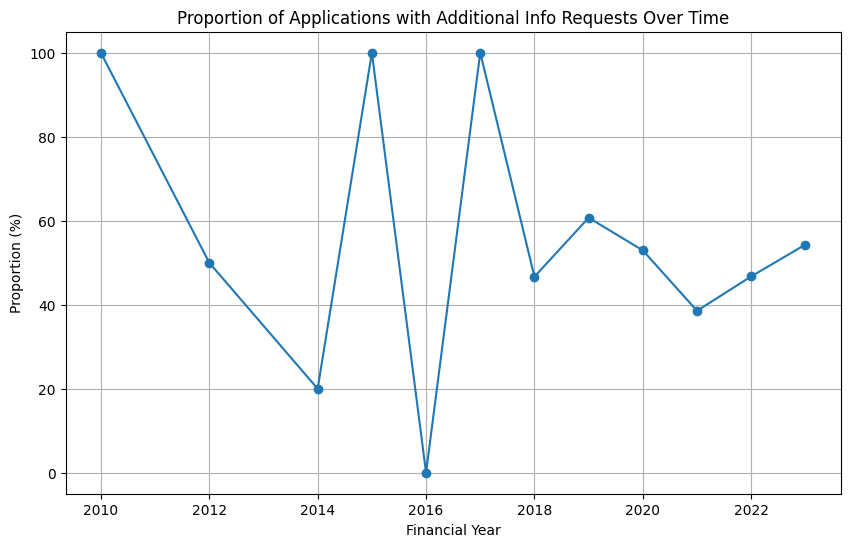

In [ ]:

# Convert date columns to datetime objects
date_columns = ['Date Complete', 'first allocated date', 'Determined date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Extract the year from the 'Date Complete' column and create a new 'Financial Year' column
df['Financial Year'] = df['Date Complete'].dt.year

# Group the data by financial year
grouped_data = df.groupby('Financial Year')

# Calculate the total number of applications and the number of applications with additional info requests for each year
total_applications = grouped_data.size()
applications_with_additional_info = grouped_data['additional info requested'].sum()

# Calculate the proportion of applications with additional info requests for each year
proportion_with_additional_info = (applications_with_additional_info / total_applications) * 100

# Create a line chart to visualize the change in the proportion over time
plt.figure(figsize=(10, 6))
plt.plot(proportion_with_additional_info.index, proportion_with_additional_info.values, marker='o', linestyle='-')
plt.title('Proportion of Applications with Additional Info Requests Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Proportion (%)')
plt.grid(True)

plt.show()
